# The logistic function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import code_python

The logistic function is a second order's recursive sequence : $x_{n+1}=rx_n(1-x_n)$, $r\in[0,4]$.
We can also write this function without sequences : $f(x)=rx(1-x)$.

An example with `r = 1.9`, `x0 = 0.01`and `iterations = 100`.        

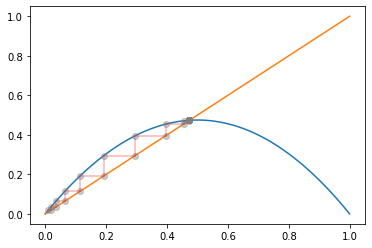

In [3]:
code_python.logistic_draw(0.01, 1.9, 100, 100)

and with `r= 3.6`

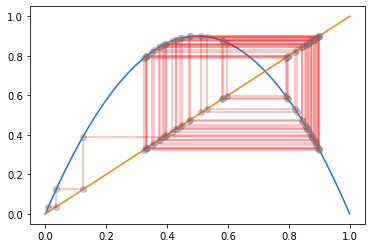

In [16]:
code_python.logistic_draw(0.01, 3.6, 50, 100)

We observe that the chaotic diagram happens when the coefficient `r`is superior or equal to 3.57

# Bifurcation

The equation to modelize the bifurcation is $N(t+1)=rN(t)(1-\frac{N(t)}{K})$ where `r` is the same parameter of the logistic function and `k` is the maximal number of points.

In [4]:
def modelelogi(N, vec):
    return(vec[0]*N*(1-(N/vec[1])))

In [5]:
modelelogi(500, np.array([3.1,1000])) # 0.3=r et 1000=k

775.0

In [6]:
def history(x0, iteration, function, vec):
    time = np.zeros(iteration)
    time[0] = 0
    points = np.zeros(iteration)
    points[0] = x0
    for i in range(1, iteration):
        points[i] = function(points[i-1], vec)
        time[i] = 1 + time[i-1]
    return (time, points)

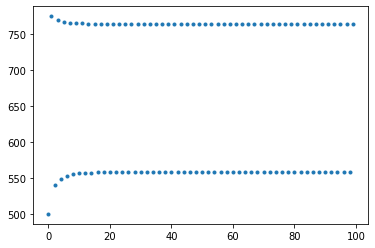

In [7]:
[t,y] = history(x0=500, iteration=100, function=modelelogi, vec=np.array([3.1, 1000]))
plt.plot(t,y,'.')

In [8]:
def bifurcation(x0, mini, maxi, function, vec, r):
    iteration = maxi-mini
    val = np.zeros((len(r),iteration))
    for i in range(len(r)):
        [t,y] = history(x0, iteration, function, vec=[r[i],1000])
        for j in range(iteration-1):    
            val[i,j] = y[j+1]
    return(val)

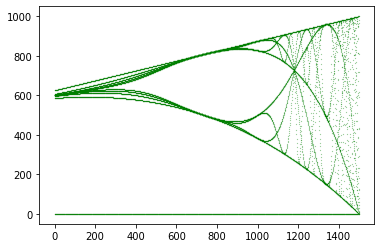

In [9]:
values = bifurcation(x0=500, mini=50, maxi=60, function=modelelogi, vec=np.array([2.5, 1000]), r=np.arange(2.5,4.0,0.001))
plt.plot(values[:,:], '.', color='green', markersize=0.3)
